In [6]:
import os
from multiprocessing import Process
from time import strftime, gmtime

from muselsl import view, record
import numpy as np
import pandas as pd


In [7]:
duration = 10
recording_path = os.path.join("data", "recording_%ssec_%s.csv" % (duration, strftime("%Y-%m-%d-%H.%M.%S", gmtime())))
recording_process = Process(target=record, args=(duration, recording_path))
recording_process.start()
recording_process.join()
print("Recording has been finished: %s" % recording_path)


Recording has been finished: data\recording_10sec_2019-07-08-21.44.31.csv


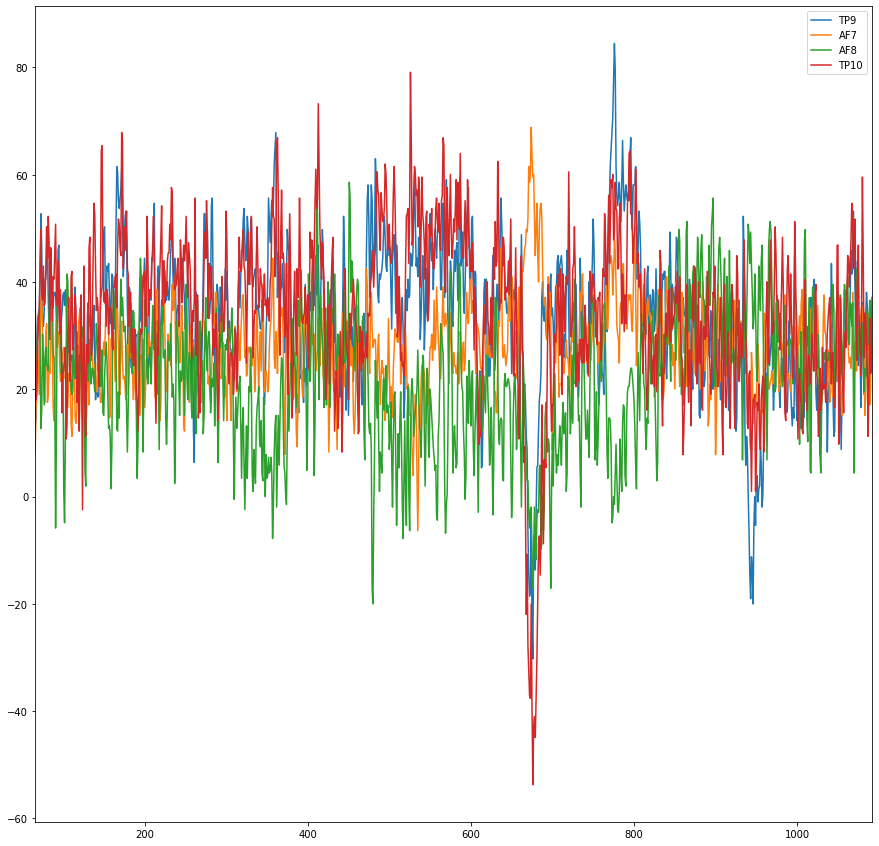

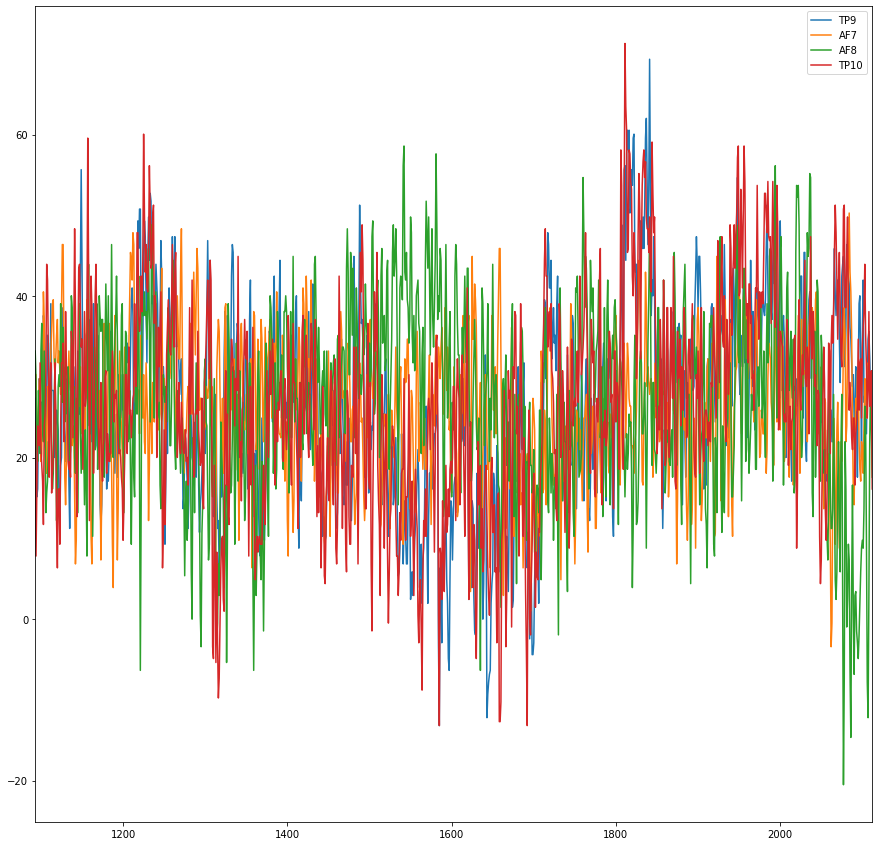

In [48]:
%matplotlib inline

eeg_df = pd.read_csv(recording_path)
electrode_names = ['TP9', 'AF7', 'AF8', 'TP10']

# convert float to int for groupby
eeg_df.timestamps = eeg_df.timestamps.astype(int)

# array that contains unique seconds of recording.  first and last values are rejected,
#  because they are gathered not strictly in the beginning or end of a second, so they contain less than 256 Hz of data
unique_seconds_array = eeg_df.timestamps.unique()[1:-1]
eeg_df = eeg_df[eeg_df.timestamps.isin(unique_seconds_array)]

# array that contains number of frames for each second (since frequency smapling is not constant).
frames_for_each_second = eeg_df.groupby('timestamps').size().values

n_seconds = 4 # 4 sec episodes
n_episodes = int(len(frames_for_each_second) / n_seconds)

unique_seconds_array = unique_seconds_array[:n_seconds*n_episodes]
seconds_per_episodes = np.split(unique_seconds_array, n_episodes)
for i in range(n_episodes):
    eeg_df[electrode_names][eeg_df.timestamps.isin(seconds_per_episodes[i])].plot(figsize=(15,15))



Creating RawArray with float64 data, n_channels=4, n_times=2400
    Range : 0 ... 2399 =      0.000 ...     9.371 secs
Ready.


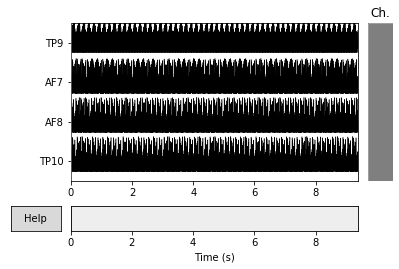

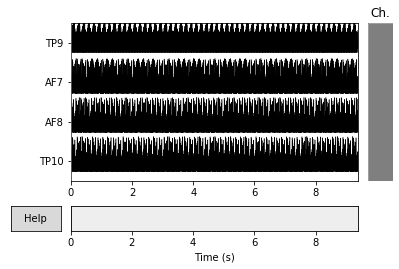

In [33]:
import numpy as np
import mne
import matplotlib.pyplot as plt
import plotly.plotly as py




# Read the CSV file as a NumPy array
eeg_df = pd.read_csv(recording_path)
electrode_names = ['TP9', 'AF7', 'AF8', 'TP10']
data = eeg_df[electrode_names].values.T



# Sampling rate of the Nautilus machine
sfreq = 256  # Hz

# Create the info structure needed by MNE
info = mne.create_info(electrode_names, sfreq)

# Finally, create the Raw object
raw = mne.io.RawArray(data, info)

# Plot it!

raw.plot()
